# Overview of the assignment's scenario

From the *map_data* provided we can see that the project included 12 areas, 4 of which were set as **TEST** and 8 as **TRAINING** (*annotated_data/test* and *annotated_data/train*).

The objective is to create, train and use YOLO models developed from the training dataset to detect seedlings on the test drone mosaics.

# 1. Split the target orthomosaic into tiles (data tiling)

The first step, which is the objective of this script, is to split each area's orthomosaic into tiles that are easier to digest for the deep learning models. Since the training data was uploaded already tiled, we dont have to run any tilling process.

The orthomosaics were divided into 10x10 m tiles with 0 m overlap.

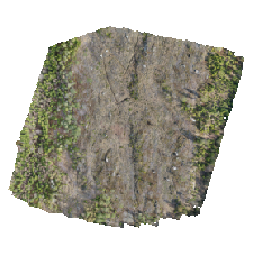 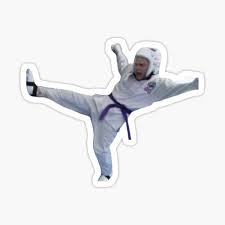

## 1.2. Training data split among students

The trainng data was shared among the students so each student have a part of it. From this personal training set, each student made their own annotations and created the deep learning models.

In my case, I was given 130 images but 21 were corrupted (black icons in the following image). The problem arises later so I have dropped them.

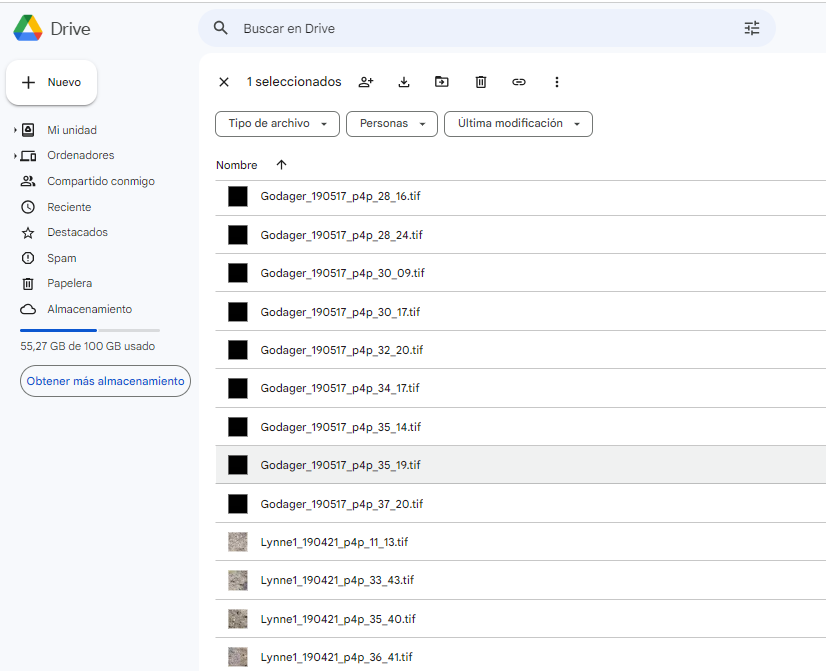


In [ ]:
# Mount Google Drive content
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install required libraries (if running in a local conda environment then other libraries might need to be installed)
!pip install geopandas
!pip install rasterio
!pip install folium matplotlib mapclassify

# general python packages
## general packages
import os, glob, shutil
from pathlib import Path
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# geospatial packages
from osgeo import gdal, ogr, osr
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
import folium

# define path to where osgeo utils (gdal_retile.py) are stored
path_osgeo_utils= "/usr/local/lib/python3.10/dist-packages/osgeo_utils"

In [ ]:
# Working directory for the HOME exam
my_drive_path="/content/drive/MyDrive/HOME_EXAM/data"

# Path to TRAINING and TEST data (annotated_data)
annotated_path = my_drive_path+"/annotated_data"
!ls $annotated_path

test  train


In [ ]:
# Path to training dataset
annotated_path_training = annotated_path+"/train"
!ls $annotated_path_training


20  full_data


In [ ]:
# test areas' orthomosaics
os.listdir(my_drive_path+"/orthomosaics/test_data")

['krakstad_202304_sun.tif',
 'ortho_hobol_042222_mavic_sun.tif',
 'braatan_40m_20230605_sun.tif',
 'galbyveien_20230504_sun.tif']

## 1.3 Create annotations

Each student with their own training set loaded the tiles in QGIS and made annotations on the seedlings he was able to see.